In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
policy_details_data = pd.read_excel("Sept 2021_Assessment_Center_Datasets/policy_details_data.xlsx",sheet_name="sample_train_pol")
claim_details_data = pd.read_excel("Sept 2021_Assessment_Center_Datasets/claim_details_data.xlsx",sheet_name="sample_train")
MVR_Violations_Data = pd.read_excel("Sept 2021_Assessment_Center_Datasets/MVR_Violations_Data.xlsx",sheet_name="Sheet1")
uszips_database = pd.read_excel("Sept 2021_Assessment_Center_Datasets/uszips_database.xlsx",sheet_name="Sheet1")

In [233]:
policy_details_data

,Policy_ID,Policy_Effective_Date,Policy_State,Insured_ZIP,Age_of_Policyholder,Earned_Premium,Policy_Age,Insured_Gender,Policy_Deductible,Insured_Education,Insured_Relation,Insured_Occupation,Insured_Hobbies
0,1,2019-07-07,Louisiana,71333,58,2692.000000,13,Female,500,PhD,Self,IT Services,dancing
1,2,2019-04-11,Nevada,89506,48,1250.000000,13,Female,500,High School,Self,IT Services,video-games
2,3,2019-03-08,Idaho,83406,53,4126.000000,12,Male,500,Associate,Self,Management,skydiving
3,4,2019-08-18,Nebraska,68134,41,3838.000000,14,Female,500,Associate,Self,Others,NaN
4,5,2019-11-24,Wyoming,82644,38,2637.000000,12,Male,500,NaN,Children,"Factory, heavy industry",bungee-jumping
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31931,31996,2019-03-12,Iowa,50131,39,7207.313336,8,Female,500,NaN,Self,Clerical,paintball
31932,31997,2019-12-01,South Carolina,29033,38,1106.587040,9,Male,500,High School,Self,"Factory, heavy industry",dancing
31933,31998,2019-02-14,Kansas,66053,58,18333.065083,11,Female,500,NaN,Self,Logistics,polo
31934,31999,2019-02-06,Montana,59401,44,8742.447629,7,Male,500,College,Self,NaN,polo


In [234]:
claim_details_data

,Policy_ID,Policy_Effective_Date,Policy_State,Insured_ZIP,Claim_ID,Date_of_Incident,Date_of_Claim,incident_state,incident_city,incident_hour_of_the_day,...,property_damage,number_of_witnesses,police_report_filed,injury_claim,property_claim,vehicle_claim,Auto_Year,auto_make,auto_model,bodily_injuries
0,26884,2019-08-10,Oregon,97735,1,2019-03-22,2019-03-24,Oregon,97735,22,...,No,3,NaN,310.117668,375.153416,2012.728916,2015,BMW,X5,No
1,26884,2019-08-10,Oregon,97735,2,2019-06-02,2019-06-05,District of Columbia,20009,5,...,Yes,3,NaN,1556.886559,1671.101012,10101.012429,2009,Jeep,Wrangler,No
2,26884,2019-08-10,Oregon,97735,3,2019-07-22,2019-07-25,Idaho,83714,13,...,Yes,1,No,2850.865056,2620.132112,16811.002832,2011,Toyota,Highlander,NaN
3,26884,2019-08-10,Oregon,97735,4,2019-09-12,2019-09-21,Oregon,97735,5,...,Yes,0,Yes,6761.475184,7200.488880,40348.035936,2010,Suburu,Legacy,No
4,26885,2019-01-19,Michigan,49707,1,2019-06-16,2019-06-24,Michigan,49707,19,...,No,2,No,360.544024,281.133624,2095.322352,2009,Dodge,Neon,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23112,31999,2019-02-06,Montana,59401,2,2019-02-14,2019-02-15,Tennessee,37309,13,...,NaN,2,No,33.446863,6.830799,40.722338,2015,Saab,92x,No
23113,31999,2019-02-06,Montana,59401,3,2019-10-25,2019-11-03,Alabama,35616,5,...,NaN,0,No,70.448186,41.329442,256.222372,2004,BMW,X6,No
23114,31999,2019-02-06,Montana,59401,4,2019-12-04,2019-12-06,Delaware,19711,23,...,No,0,Yes,309.958532,272.031912,1813.009556,2014,Nissan,Pathfinder,NaN
23115,32000,2019-05-04,Texas,76048,1,2019-03-26,2019-04-03,Texas,76048,23,...,No,1,No,885.003120,826.912260,4957.084620,2009,Nissan,Pathfinder,Yes


In [235]:
uszips_database= uszips_database.rename(columns={"zip": "Insured_ZIP"})
uszips_database

,Insured_ZIP,lat,lng,city,state_id,state_name,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,timezone
0,601,18.18004,-66.75218,Adjuntas,PR,Puerto Rico,17242,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",Adjuntas|Utuado,72001|72141,America/Puerto_Rico
1,602,18.36073,-67.17517,Aguada,PR,Puerto Rico,38442,523.5,72003,Aguada,{'72003':100},Aguada,72003,America/Puerto_Rico
2,603,18.45439,-67.12202,Aguadilla,PR,Puerto Rico,48814,667.9,72005,Aguadilla,{'72005':100},Aguadilla,72005,America/Puerto_Rico
3,606,18.16724,-66.93828,Maricao,PR,Puerto Rico,6437,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",Maricao|Yauco|Sabana Grande,72093|72153|72121,America/Puerto_Rico
4,610,18.29032,-67.12243,Anasco,PR,Puerto Rico,27073,312.0,72011,Añasco,"{'72003':0.55,'72011':99.45}",Añasco|Aguada,72011|72003,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33094,99923,55.97796,-130.03671,Hyder,AK,Alaska,15,2.1,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,2198,America/Sitka
33095,99925,55.55767,-132.97627,Klawock,AK,Alaska,927,5.7,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,2198,America/Sitka
33096,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,1635,4.2,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,2198,America/Metlakatla
33097,99927,56.25100,-133.37571,Point Baker,AK,Alaska,38,0.2,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,2198,America/Sitka


In [236]:
MVR_Violations_Data

,Policy_ID,Violation_Date,Type_of_Violation
0,27738,2013-01-01,Traffic Violations
1,31198,2013-01-01,Driving Under Influence
2,26957,2013-01-01,Traffic Violations
3,27611,2013-01-02,Others
4,28265,2013-01-02,Others
...,...,...,...
16997,31753,2018-12-29,Others
16998,28255,2018-12-30,Others
16999,29003,2018-12-30,Driving Under Influence
17000,30049,2018-12-30,Others


In [237]:
voilation_count=MVR_Violations_Data.groupby(["Policy_ID"]).count().drop(columns=['Violation_Date']).rename(columns={"Type_of_Violation": "Total_MVR_violation"})

In [238]:
voilation_count

,Total_MVR_violation
Policy_ID,
26884,8
26885,1
26886,3
26888,3
26889,1
...,...
31996,1
31997,1
31998,1


# Merging data sources

In [239]:
data=pd.merge(claim_details_data, policy_details_data, on=["Policy_ID","Policy_Effective_Date","Policy_State","Insured_ZIP"],how="left")

In [240]:
data=pd.merge(data, uszips_database, on=["Insured_ZIP"],how="left")

In [241]:
data=pd.merge(data, voilation_count, on=["Policy_ID"], how="left")

In [242]:
data

,Policy_ID,Policy_Effective_Date,Policy_State,Insured_ZIP,Claim_ID,Date_of_Incident,Date_of_Claim,incident_state,incident_city,incident_hour_of_the_day,...,state_name,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,timezone,Total_MVR_violation
0,26884,2019-08-10,Oregon,97735,1,2019-03-22,2019-03-24,Oregon,97735,22,...,Oregon,94,0.2,41037,Lake,{'41037':100},Lake,41037,America/Los_Angeles,8.0
1,26884,2019-08-10,Oregon,97735,2,2019-06-02,2019-06-05,District of Columbia,20009,5,...,Oregon,94,0.2,41037,Lake,{'41037':100},Lake,41037,America/Los_Angeles,8.0
2,26884,2019-08-10,Oregon,97735,3,2019-07-22,2019-07-25,Idaho,83714,13,...,Oregon,94,0.2,41037,Lake,{'41037':100},Lake,41037,America/Los_Angeles,8.0
3,26884,2019-08-10,Oregon,97735,4,2019-09-12,2019-09-21,Oregon,97735,5,...,Oregon,94,0.2,41037,Lake,{'41037':100},Lake,41037,America/Los_Angeles,8.0
4,26885,2019-01-19,Michigan,49707,1,2019-06-16,2019-06-24,Michigan,49707,19,...,Michigan,21897,40.6,26007,Alpena,"{'26007':97.54,'26141':2.46}",Alpena|Presque Isle,26007|26141,America/Detroit,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23112,31999,2019-02-06,Montana,59401,2,2019-02-14,2019-02-15,Tennessee,37309,13,...,Montana,13720,1711.7,30013,Cascade,{'30013':100},Cascade,30013,America/Denver,1.0
23113,31999,2019-02-06,Montana,59401,3,2019-10-25,2019-11-03,Alabama,35616,5,...,Montana,13720,1711.7,30013,Cascade,{'30013':100},Cascade,30013,America/Denver,1.0
23114,31999,2019-02-06,Montana,59401,4,2019-12-04,2019-12-06,Delaware,19711,23,...,Montana,13720,1711.7,30013,Cascade,{'30013':100},Cascade,30013,America/Denver,1.0
23115,32000,2019-05-04,Texas,76048,1,2019-03-26,2019-04-03,Texas,76048,23,...,Texas,24118,78.2,48221,Hood,"{'48221':99.7,'48425':0.3}",Hood|Somervell,48221|48425,America/Chicago,3.0


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23117 entries, 0 to 23116
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Policy_ID                    23117 non-null  int64         
 1   Policy_Effective_Date        23117 non-null  datetime64[ns]
 2   Policy_State                 23117 non-null  object        
 3   Insured_ZIP                  23117 non-null  int64         
 4   Claim_ID                     23117 non-null  int64         
 5   Date_of_Incident             23117 non-null  datetime64[ns]
 6   Date_of_Claim                23117 non-null  datetime64[ns]
 7   incident_state               23117 non-null  object        
 8   incident_city                23117 non-null  int64         
 9   incident_hour_of_the_day     23117 non-null  int64         
 10  Claim_Amount                 23117 non-null  int64         
 11  SIU_Referral_Flag            23117 non-nu

# Data pre processing

In [244]:
# Fill missing mvr voilation as zero
# Fill other missing values as NA
data["Total_MVR_violation"] = data["Total_MVR_violation"].fillna(0)
data = data.fillna("unknown")

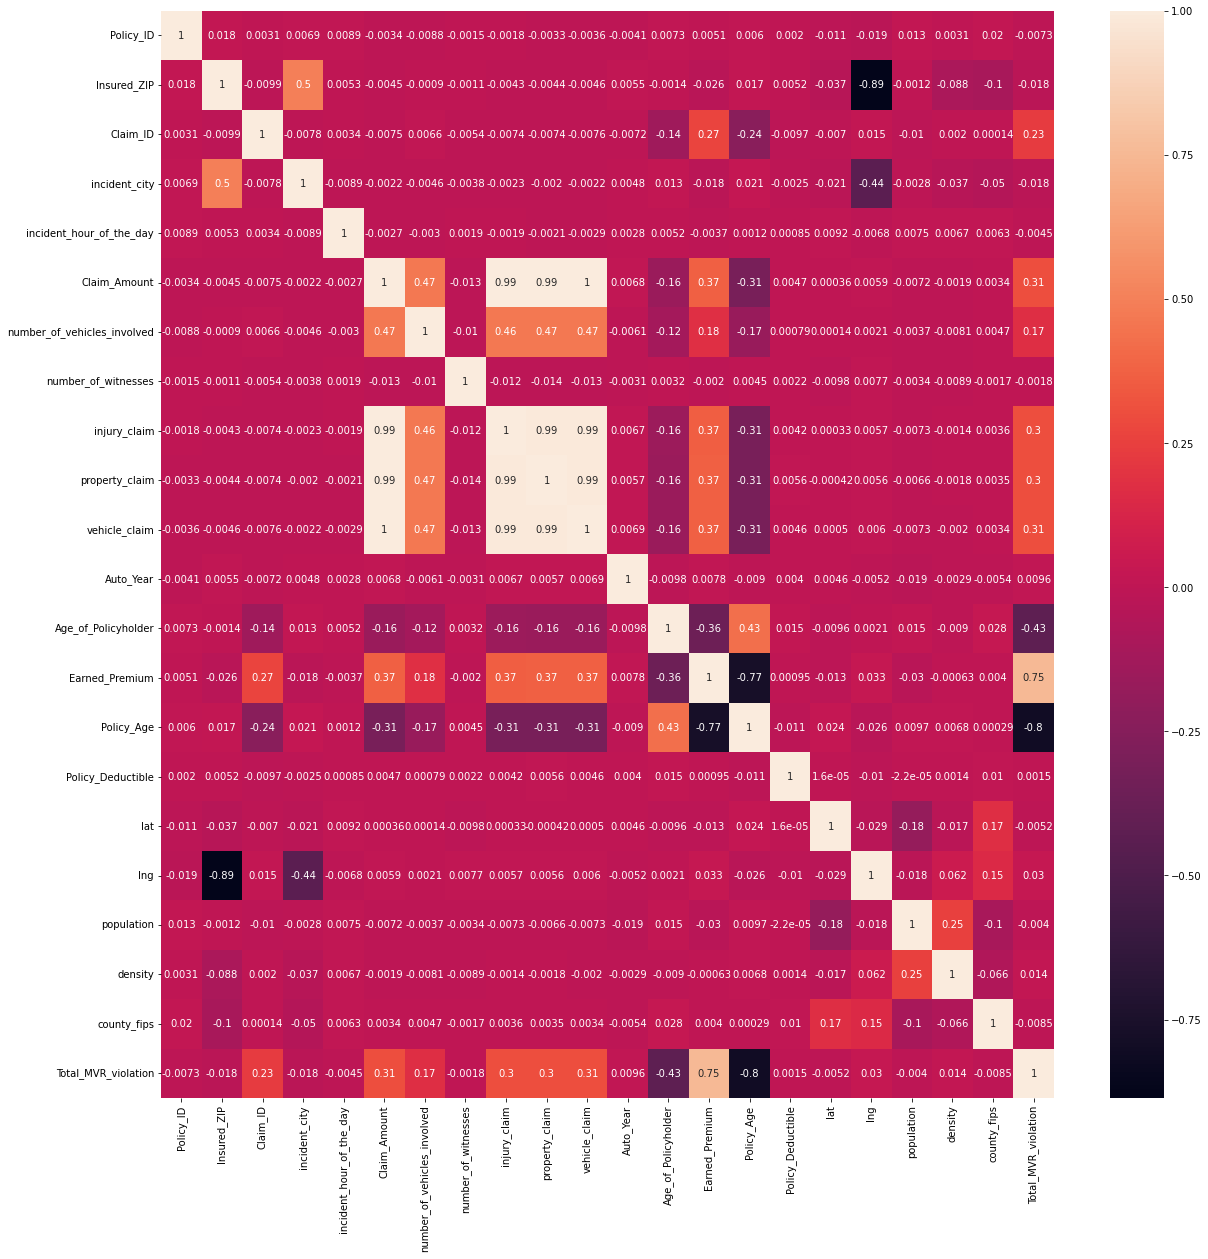

In [245]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

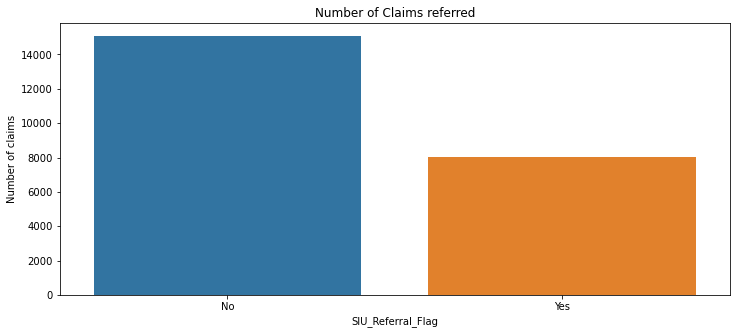

In [246]:
temp = data.groupby('SIU_Referral_Flag').count()
temp['SIU_Referral_Flag'] = np.array(temp.index)

plt.figure(figsize=(12,5))
sns.barplot(x='SIU_Referral_Flag',y='Policy_ID', data=temp).set(xlabel='SIU_Referral_Flag', ylabel='Number of claims')
plt.title('Number of Claims referred')
plt.show()

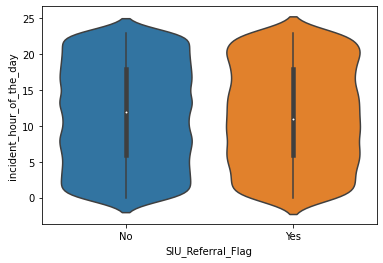

In [247]:
z= sns.violinplot(data=data, x='SIU_Referral_Flag', y='incident_hour_of_the_day')

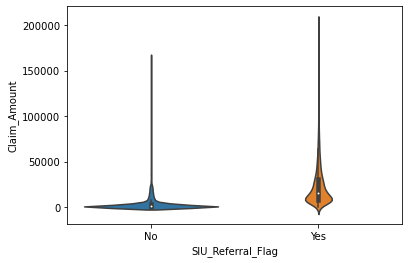

In [248]:
z= sns.violinplot(data=data, x='SIU_Referral_Flag', y='Claim_Amount')

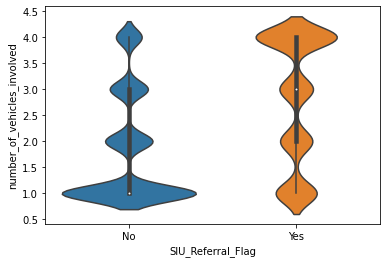

In [249]:
z= sns.violinplot(data=data, x='SIU_Referral_Flag', y='number_of_vehicles_involved')

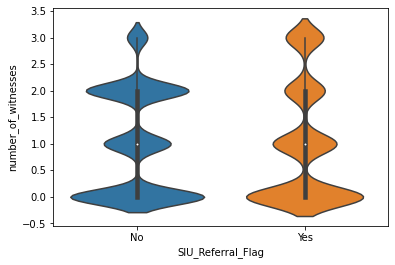

In [250]:
z= sns.violinplot(data=data, x='SIU_Referral_Flag', y='number_of_witnesses')

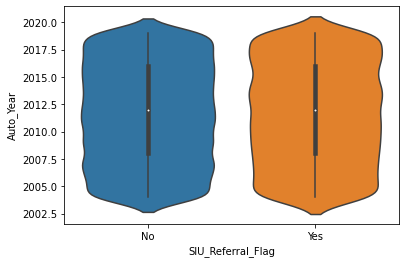

In [251]:
z= sns.violinplot(data=data, x='SIU_Referral_Flag', y='Auto_Year')

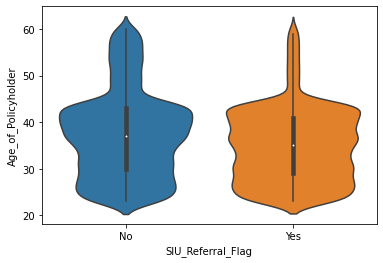

In [252]:
z= sns.violinplot(data=data, x='SIU_Referral_Flag', y='Age_of_Policyholder')

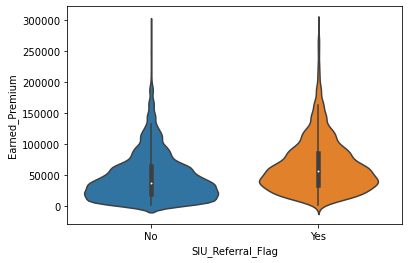

In [253]:
z= sns.violinplot(data=data, x='SIU_Referral_Flag', y='Earned_Premium')

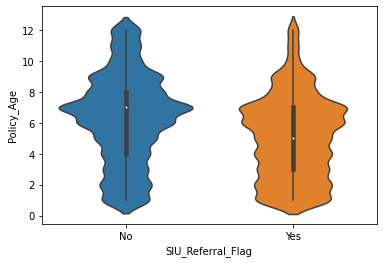

In [254]:
z= sns.violinplot(data=data, x='SIU_Referral_Flag', y='Policy_Age')

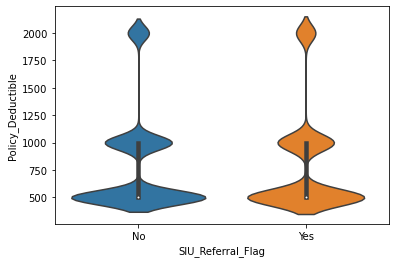

In [255]:
z= sns.violinplot(data=data, x='SIU_Referral_Flag', y='Policy_Deductible')

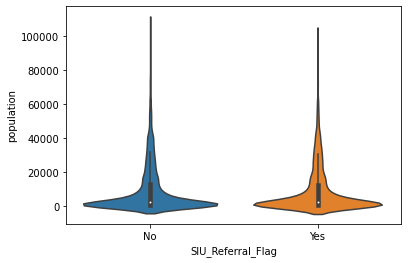

In [256]:
z= sns.violinplot(data=data, x='SIU_Referral_Flag', y='population')

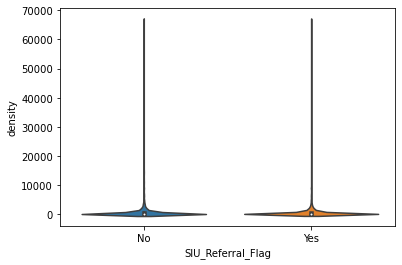

In [257]:
z= sns.violinplot(data=data, x='SIU_Referral_Flag', y='density')

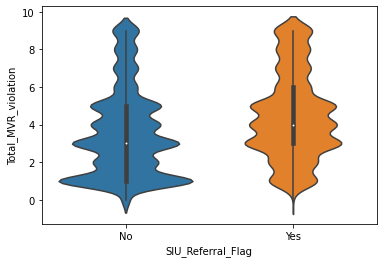

In [258]:
z= sns.violinplot(data=data, x='SIU_Referral_Flag', y='Total_MVR_violation')

In [259]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

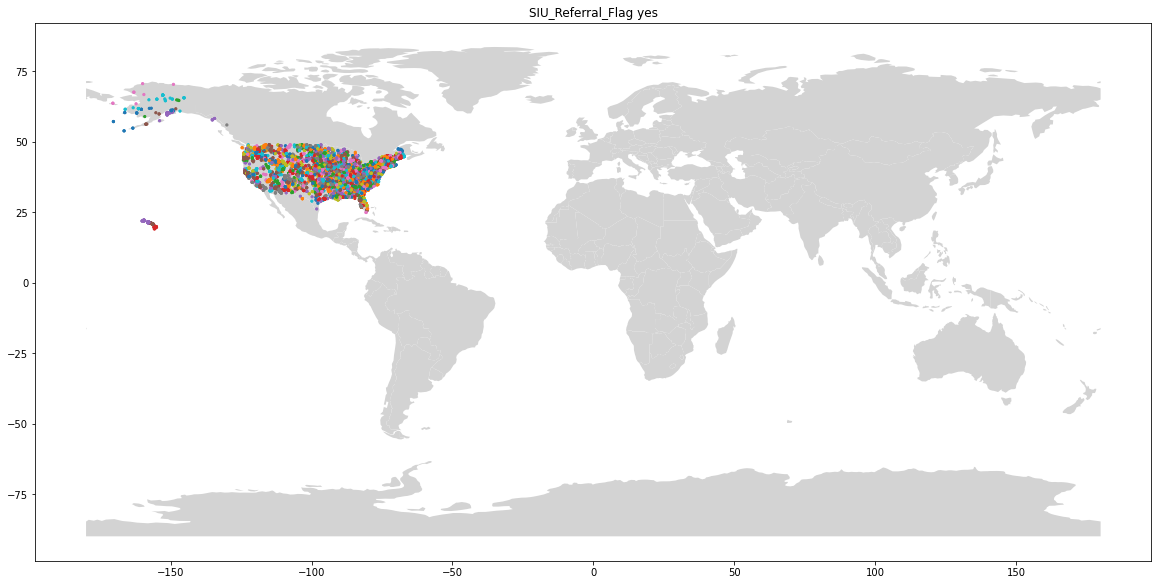

In [260]:
data_yes = data[data['SIU_Referral_Flag']=='Yes']

# Plotting global SIU_Referral_Flag  which are yes

gdf = gpd.GeoDataFrame(
    data_yes, geometry=gpd.points_from_xy(data_yes['lng'], data_yes['lat']))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='lightgrey',figsize=(20, 12))

gdf.plot(ax=ax, column = data_yes['county_name'],  markersize =5)
plt.title('SIU_Referral_Flag yes')
plt.show()

In [261]:
# sns.pairplot(data)

In [263]:
data = data.drop(columns=['Policy_ID','Policy_Effective_Date','Insured_ZIP','Claim_ID','Date_of_Incident','Date_of_Claim','injury_claim','property_claim','vehicle_claim','Policy_Age','city','state_id','state_name','county_fips','county_name','county_weights','county_names_all','county_fips_all','timezone'])

In [264]:
data

,Policy_State,incident_state,incident_city,incident_hour_of_the_day,Claim_Amount,SIU_Referral_Flag,Incident_Type,Collision_Type,Incident_Severity,authorities_contacted,...,Policy_Deductible,Insured_Education,Insured_Relation,Insured_Occupation,Insured_Hobbies,lat,lng,population,density,Total_MVR_violation
0,Oregon,Oregon,97735,22,2684,No,Multiple vehicles,Side,Minor,Ambulance,...,1000,Masters,Self,Others,unknown,43.41066,-120.92597,94,0.2,8.0
1,Oregon,District of Columbia,20009,5,13313,Yes,Multiple vehicles,Front,Major,Other,...,1000,Masters,Self,Others,unknown,43.41066,-120.92597,94,0.2,8.0
2,Oregon,Idaho,83714,13,22256,Yes,Vehicle Theft,Front,Total Loss,Other,...,1000,Masters,Self,Others,unknown,43.41066,-120.92597,94,0.2,8.0
3,Oregon,Oregon,97735,5,54288,Yes,Multiple vehicles,Front,Total Loss,Police,...,1000,Masters,Self,Others,unknown,43.41066,-120.92597,94,0.2,8.0
4,Michigan,Michigan,49707,19,2703,No,Single vehicles,Rear,Minor,Fire Brigade,...,500,College,unknown,Logistics,yachting,45.09161,-83.49646,21897,40.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23112,Montana,Tennessee,37309,13,53,No,Multiple vehicles,unknown,Trivial,Other,...,500,College,Self,unknown,polo,47.51103,-111.27552,13720,1711.7,1.0
23113,Montana,Alabama,35616,5,343,No,Vehicle Theft,Side,Trivial,Police,...,500,College,Self,unknown,polo,47.51103,-111.27552,13720,1711.7,1.0
23114,Montana,Delaware,19711,23,2374,No,Single vehicles,Side,Major,Fire Brigade,...,500,College,Self,unknown,polo,47.51103,-111.27552,13720,1711.7,1.0
23115,Texas,Texas,76048,23,6660,No,Multiple vehicles,Front,Total Loss,Other,...,500,unknown,Self,Logistics,bungee-jumping,32.42318,-97.80877,24118,78.2,3.0


In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23117 entries, 0 to 23116
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Policy_State                 23117 non-null  object 
 1   incident_state               23117 non-null  object 
 2   incident_city                23117 non-null  int64  
 3   incident_hour_of_the_day     23117 non-null  int64  
 4   Claim_Amount                 23117 non-null  int64  
 5   SIU_Referral_Flag            23117 non-null  object 
 6   Incident_Type                23117 non-null  object 
 7   Collision_Type               23117 non-null  object 
 8   Incident_Severity            23117 non-null  object 
 9   authorities_contacted        23117 non-null  object 
 10  number_of_vehicles_involved  23117 non-null  int64  
 11  property_damage              23117 non-null  object 
 12  number_of_witnesses          23117 non-null  int64  
 13  police_report_fi

# Explanatory and response Encoded

In [34]:
X = data.copy()
X= X.drop(columns="SIU_Referral_Flag")
X = pd.get_dummies(X,drop_first=True)

y = data["SIU_Referral_Flag"]
y =pd.get_dummies(y,drop_first=True)

In [35]:
X

,incident_city,incident_hour_of_the_day,Claim_Amount,number_of_vehicles_involved,number_of_witnesses,Auto_Year,Age_of_Policyholder,Earned_Premium,Policy_Deductible,lat,...,Insured_Hobbies_hiking,Insured_Hobbies_kayaking,Insured_Hobbies_movies,Insured_Hobbies_paintball,Insured_Hobbies_polo,Insured_Hobbies_reading,Insured_Hobbies_skydiving,Insured_Hobbies_unknown,Insured_Hobbies_video-games,Insured_Hobbies_yachting
0,97735,22,2684,2,3,2015,40,79776.508879,1000,43.41066,...,0,0,0,0,0,0,0,1,0,0
1,20009,5,13313,4,3,2009,40,79776.508879,1000,43.41066,...,0,0,0,0,0,0,0,1,0,0
2,83714,13,22256,4,1,2011,40,79776.508879,1000,43.41066,...,0,0,0,0,0,0,0,1,0,0
3,97735,5,54288,4,0,2010,40,79776.508879,1000,43.41066,...,0,0,0,0,0,0,0,1,0,0
4,49707,19,2703,1,2,2009,59,13157.395316,500,45.09161,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23112,37309,13,53,1,2,2015,44,8742.447629,500,47.51103,...,0,0,0,0,1,0,0,0,0,0
23113,35616,5,343,1,0,2004,44,8742.447629,500,47.51103,...,0,0,0,0,1,0,0,0,0,0
23114,19711,23,2374,4,0,2014,44,8742.447629,500,47.51103,...,0,0,0,0,1,0,0,0,0,0
23115,76048,23,6660,1,1,2009,35,37221.058477,500,32.42318,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Model Building

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn import metrics

## Logistic regression

In [112]:
from sklearn.linear_model import LogisticRegression

In [266]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [267]:
y_pred = clf.predict(X_test)

In [268]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8062283737024222
F1 Score: 0.6691285081240768


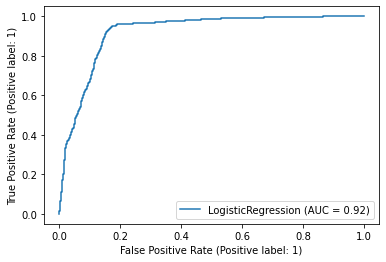

In [269]:
metrics.plot_roc_curve(clf,X_test, y_test)
plt.show()

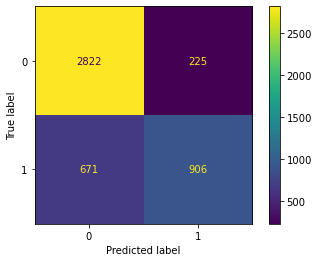

In [270]:
metrics.plot_confusion_matrix(clf,X_test, y_test)
plt.show()

In [151]:
clf = LogisticRegression(random_state=0)
clf.fit(X, y)
acc=np.mean(cross_val_score(clf, X, y, cv=5,scoring='accuracy'))
f1=np.mean(cross_val_score(clf, X, y, cv=5,scoring='f1'))
print("Accuracy:",acc)
print("F1 Score:",f1)

C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Accuracy: 0.8025694548919311
F1 Score: 0.6681998822343338


C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Decision Tree

In [271]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [272]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [273]:
y_pred = clf.predict(X_test)

In [274]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8083910034602076
F1 Score: 0.7212083071113908


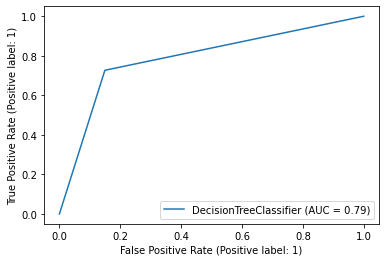

In [275]:
metrics.plot_roc_curve(clf,X_test, y_test)
plt.show()

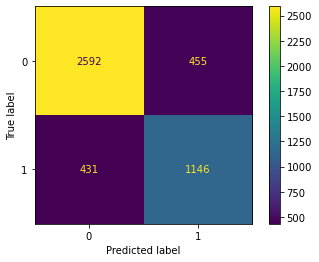

In [276]:
metrics.plot_confusion_matrix(clf,X_test, y_test)
plt.show()

In [149]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)
acc=np.mean(cross_val_score(clf, X, y, cv=5,scoring='accuracy'))
f1=np.mean(cross_val_score(clf, X, y, cv=5,scoring='f1'))
print("Accuracy:",acc)
print("F1 Score:",f1)

C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Accuracy: 0.8025694548919311
F1 Score: 0.6681998822343338


C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Random forest

In [277]:
from sklearn.ensemble import RandomForestClassifier

In [278]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)

<ipython-input-278-0507c824fb5d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [279]:
clf.score(X_test,y_test)

0.8732698961937716

In [280]:
y_pred = clf.predict(X_test)

In [281]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8732698961937716
F1 Score: 0.8357623318385651


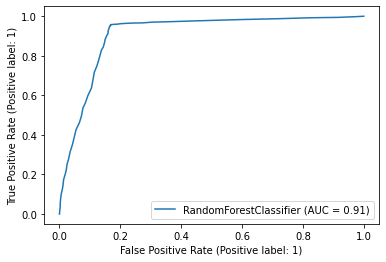

In [282]:
metrics.plot_roc_curve(clf,X_test, y_test)
plt.show()

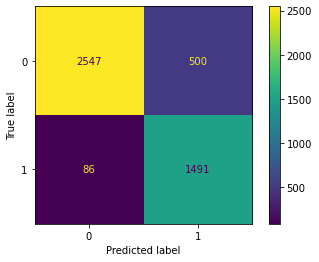

In [283]:
metrics.plot_confusion_matrix(clf,X_test, y_test)
plt.show()

In [152]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)
acc=np.mean(cross_val_score(clf, X, y, cv=5,scoring='accuracy'))
f1=np.mean(cross_val_score(clf, X, y, cv=5,scoring='f1'))
print("Accuracy:",acc)
print("F1 Score:",f1)

<ipython-input-152-0730047e3c06>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,)

Accuracy: 0.8758058193312062
F1 Score: 0.8409111741821474


# Xgboost

In [284]:
from xgboost import XGBClassifier

In [285]:
clf = XGBClassifier()
clf.fit(X_train,y_train)

C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[21:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [286]:
y_pred = clf.predict(X_test)

In [287]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8592128027681661
F1 Score: 0.8110304789550071


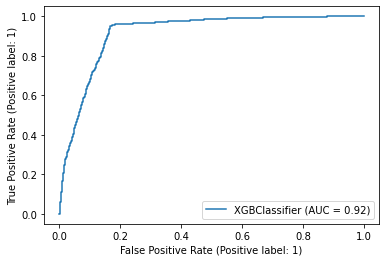

In [288]:
metrics.plot_roc_curve(clf,X_test, y_test)
plt.show()

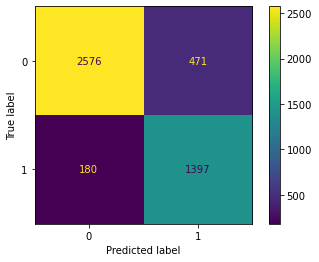

In [289]:
metrics.plot_confusion_matrix(clf,X_test, y_test)
plt.show()

In [158]:
clf = XGBClassifier()
clf.fit(X, y)
acc=np.mean(cross_val_score(clf, X, y, cv=5,scoring='accuracy'))
f1=np.mean(cross_val_score(clf, X, y, cv=5,scoring='f1'))
print("Accuracy:",acc)
print("F1 Score:",f1)

C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[01:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[01:31:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[01:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[01:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[01:31:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[01:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[01:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[01:31:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[01:31:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[01:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[01:31:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8661160591655832
F1 Score: 0.8233851267112854


# Gridsearch and Hyperparameter tuning with the best Model

In [159]:
pipe = Pipeline([('scalar',StandardScaler()),
                     ('classifier',RandomForestClassifier(random_state = 1))])

grid_param = [{"classifier__n_estimators": [1,20,50,100],
               "classifier__criterion": ['gini', 'entropy'],
               "classifier__max_depth":[1,20,50,100,None],
               "classifier__min_samples_leaf":[5,10,15]}]

gridsearch = GridSearchCV(pipe, grid_param, cv=3, verbose=3,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


C:\Users\utkar\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [162]:
gridsearch.best_estimator_

Pipeline(steps=[('scalar', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=50,
                                        min_samples_leaf=5, n_estimators=50,
                                        random_state=1))])

In [163]:
y_pred = best_model.predict(X_test)

In [164]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8732698961937716
F1 Score: 0.8363128491620112


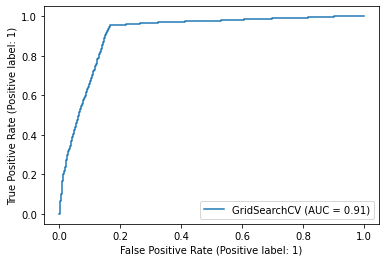

In [165]:
metrics.plot_roc_curve(best_model,X_test, y_test)
plt.show()

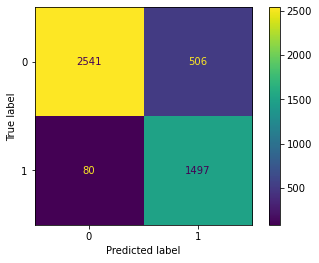

In [166]:
metrics.plot_confusion_matrix(best_model,X_test, y_test)
plt.show()

In [185]:
clf = RandomForestClassifier(criterion='entropy', max_depth=50,min_samples_leaf=5, n_estimators=50,random_state=0)
clf.fit(X, y)
acc=np.mean(cross_val_score(clf, X, y, cv=5,scoring='accuracy'))
f1=np.mean(cross_val_score(clf, X, y, cv=5,scoring='f1'))
print("Accuracy:",acc)
print("F1 Score:",f1)

<ipython-input-185-341cf7d2803a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,)

Accuracy: 0.8761085968532545
F1 Score: 0.8415037901109308


In [215]:
std[1:10]

array([0.00197633, 0.19435554, 0.05029147, 0.00591195, 0.00189149,
       0.00625334, 0.01526162, 0.0010203 , 0.00306193])

# Feature importance based on mean decrease in impurity

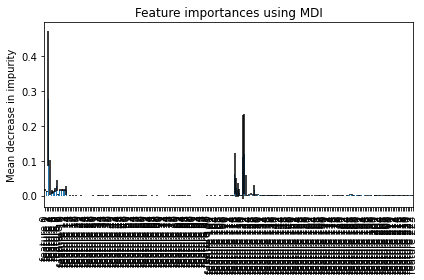

In [232]:
importances = clf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in clf.estimators_], axis=0)

feature_names = [f'feature {i}' for i in range(X.shape[1])]
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [225]:
fe = pd.DataFrame()
fe["feature_names"] = feature_names
fe["std"] = std

In [231]:
fe.sort_values(by=['std'],ascending=False).head(30)

,feature_names,std
2,feature 2,0.194356
120,feature 120,0.120001
121,feature 121,0.115092
115,feature 115,0.059748
3,feature 3,0.050291
122,feature 122,0.030425
116,feature 116,0.027711
117,feature 117,0.019645
127,feature 127,0.015428
7,feature 7,0.015262


In [229]:
top30features = fe.sort_values(by=['std'],ascending=False).head(30).index

In [230]:
X.columns[top30features]

Index(['Claim_Amount', 'Incident_Severity_Minor',
       'Incident_Severity_Total Loss', 'Incident_Type_Single vehicles',
       'number_of_vehicles_involved', 'Incident_Severity_Trivial',
       'Incident_Type_Vehicle Theft', 'Collision_Type_Rear',
       'property_damage_Yes', 'Earned_Premium', 'Total_MVR_voilation',
       'Collision_Type_Side', 'Age_of_Policyholder', 'number_of_witnesses',
       'lat', 'authorities_contacted_Police', 'density', 'incident_city',
       'lng', 'population', 'authorities_contacted_unknown',
       'incident_hour_of_the_day', 'property_damage_unknown',
       'Incident_Type_Parked Car', 'Auto_Year', 'Collision_Type_unknown',
       'Insured_Gender_Male', 'authorities_contacted_Other',
       'Policy_Deductible', 'bodily_injuries_unknown'],
      dtype='object')